In [6]:
from keras.datasets import mnist
import numpy as np
import tensorflow as tf

(train_X_raw, train_y_raw), (test_X_raw, test_y_raw) = mnist.load_data()

print(train_X_raw.dtype)
print(train_y_raw.dtype)
print(test_X_raw.dtype)
print(test_y_raw.dtype)

uint8
uint8
uint8
uint8


In [7]:
# Check for Nan Values in data
np.isnan(np.min(train_X_raw)),np.isnan(np.min(train_y_raw)),np.isnan(np.min(test_X_raw)),np.isnan(np.min(test_X_raw))


(False, False, False, False)

In [8]:
# Make tensors from np arrays 
train_X = tf.constant(train_X_raw)
train_y = tf.constant(train_y_raw)
test_X = tf.constant(test_X_raw)
test_y = tf.constant(test_y_raw)

# Make the X tensors floats 
train_X = tf.cast(train_X,tf.float32)
test_X = tf.cast(test_X,tf.float32)

# reshape the X tensors to linear from square (x , 28, 28) -> (x, 28^2)
train_X = tf.reshape(train_X,[60000,784])
test_X = tf.reshape(test_X,[10000,784])

# One hot encode the y values 
train_y_onehot = tf.one_hot(train_y,depth=10)
test_y_onehot = tf.one_hot(test_y,depth=10)

# Check dtypes are sensible
print(train_X.dtype)
print(train_y.dtype)
print(test_X.dtype)
print(test_y.dtype)




<dtype: 'float32'>
<dtype: 'uint8'>
<dtype: 'float32'>
<dtype: 'uint8'>


In [9]:

# Normalise the data 
def normalise_tensor(tensor):
    tensor = tf.truediv(
        tf.subtract(
            tensor, 
            tf.reduce_min(tensor)
        ), 
        tf.subtract(
            tf.reduce_max(tensor), 
            tf.reduce_min(tensor)
        )
        )
    return tensor

train_X = normalise_tensor(train_X)
train_y = normalise_tensor(train_y)
test_X = normalise_tensor(test_X)
test_y = normalise_tensor(test_y)

In [10]:
# Build the model 
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
number_reading_model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(28*28), # 100 units
  tf.keras.layers.Dense(128,activation="relu"), 
  tf.keras.layers.Dense(10,activation="softmax"),
  # tf.keras.layers.Dense(10,activation="softmax")
])

# Compile the model
number_reading_model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

    
# Fit the model and save the history (we can plot this)
batch_size=128
history_1 = number_reading_model_1.fit(train_X, train_y_onehot, batch_size=batch_size, epochs=15)

Epoch 1/15


2022-05-27 10:34:03.707037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 3s 6ms/step - loss: 0.0251 - mae: 0.0251
Epoch 2/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0121 - mae: 0.0121
Epoch 3/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0102 - mae: 0.0102
Epoch 4/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0088 - mae: 0.0088
Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0080 - mae: 0.0080
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0077 - mae: 0.0077
Epoch 7/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0072 - mae: 0.0072
Epoch 8/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0069 - mae: 0.0069
Epoch 9/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0068 - mae: 0.0068
Epoch 10/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0069 - mae: 0.0069
Epoch 11/15
469/469 [==============================] - 3s 6m

In [11]:
print(type(history_1))
print(type(history_1.history))
print((history_1.history))
# print((history_1['steps']))
print((history_1.params))

<class 'keras.callbacks.History'>
<class 'dict'>
{'loss': [0.025144891813397408, 0.012149265967309475, 0.01018141582608223, 0.008849467150866985, 0.0080160703510046, 0.007662869989871979, 0.00720629608258605, 0.0068984986282885075, 0.006755818147212267, 0.006891520693898201, 0.0063719251193106174, 0.006310080178081989, 0.006335404701530933, 0.0060517387464642525, 0.005676086060702801], 'mae': [0.025144891813397408, 0.012149265967309475, 0.01018141582608223, 0.008849467150866985, 0.0080160703510046, 0.007662869989871979, 0.00720629608258605, 0.0068984986282885075, 0.006755818147212267, 0.006891520693898201, 0.0063719251193106174, 0.006310080178081989, 0.006335404701530933, 0.0060517387464642525, 0.005676086060702801]}
{'verbose': 1, 'epochs': 15, 'steps': 469}


 42/313 [===>..........................] - ETA: 1s - loss: 0.0076 - mae: 0.0076

2022-05-27 10:34:47.295868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.0061 - mae: 0.0061
Test loss: 0.00613870844244957
Test accuracy: 0.00613870844244957
[0.00613870844244957, 0.00613870844244957]


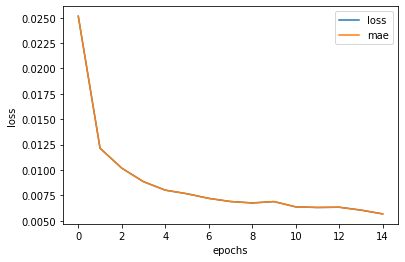

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

score = number_reading_model_1.evaluate(test_X, test_y_onehot)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
print(score)

In [13]:
# Calculate correct fraction

from matplotlib import pyplot
predictions = number_reading_model_1.predict(test_X)
# test_y_onehot
n_matched = 0.0
n_not_matched = 0.0
for i in range(1000):
    if(predictions[i].argmax() == tf.math.argmax(test_y_onehot[i,:]).numpy()):
        n_matched+=1
    else:
        n_not_matched+=1
        # pyplot.subplot(330 + 1 + i)
        # print(i)
        # pyplot.imshow(test_X_raw[i], cmap=pyplot.get_cmap('gray'))  
        # pyplot.show()
        # print(f"predicted_number={(predictions[i].argmax())}")
        # print(test_y_onehot[i])
        
print(f"Matched fraction = {n_matched/(n_matched+n_not_matched)}")


2022-05-27 10:34:48.936603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Matched fraction = 0.967


Matched fraction = 0.11 with no softmax 1000 check

Matched fraction = 0.916 with softmax 1000 check (loss: 0.1001 - mae: 0.1001)

Matched fraction = 0.824 with softmax + extra layer 1000 check (0.0400 - mae: 0.0400)

Matched fraction = 0.908 with softmax + extra layer + 100 epocs + 1000 check (loss: 0.0213 - mae: 0.0213)

Matched fraction =  with softmax + extra layer + 35 epocs + 1000 check ()